In [7]:
%matplotlib inline

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import re
import glob
from PIL import Image
import time

import copy
plt.ion()

from loess import Loess
import pickle
import cv2
import math

from tqdm import tqdm 

In [8]:
all_pred = []

In [12]:

def find_miss(y,app):
        y = np.array(y)
        x = [i for i in range(y.shape[0])]
        x = np.array(x)
        
        #split data into trianing and test or missing data
        fx,vx,fy,vy = train_test_split(x,y,test_size=0.5, random_state=4)
        
#         fx, fy = zip(*sorted(zip(fx, fy)))
#         vx, vy = zip(*sorted(zip(vx, vy)))
        
        fx = np.array(fx)
        vx = np.array(vx)
        fy = np.array(fy)
        vy = np.array(vy)
        
        pred_y = np.zeros(vy.shape)
        
        for i in range(fy.shape[1]):
            for j in range(fy.shape[2]):
                loess = Loess(fx, fy[:,i,j])
                for K,gx in enumerate(vx):
                    pred_y[K,i,j] = loess.estimate(gx, window=5)
                    if math.isnan(pred_y[K,i,j]):
                        pred_y[K,i,j] = 0
                    elif pred_y[K,i,j]>150:
                        pred_y[K,i,j] = 255
                    else :
                        pred_y[K,i,j] = 0
                    
                    
        
        
        for i in range(pred_y.shape[0]):
            all_pred.append(pred_y[i])
            f, axarr = plt.subplots(1,2)
            axarr[0].imshow(pred_y[i])
            axarr[1].imshow(vy[i])
#             plt.imshow(pred_y[i])
            plt.show()

In [13]:
#find gait nm-05 nm-06
with open("indices_gait.txt", "rb") as fl:
    ind = pickle.load(fl)
    
#gait energy --helper function
def find_gait(path,app,nm):
    files = glob.glob(path+"*.png")
    files.sort()
    
    num_gait=0
    for j in range(len(ind[int(app)][nm-1])-2):
        if j is None:
            continue
        c=0
        #all images in gait cycle
        y = []
        for i in range(ind[int(app)][nm-1][j],ind[int(app)][nm-1][j+2]+1):
            img = cv2.imread(files[i],0)
            y.append(img)
        #predict missing latent vector
        find_miss(y,app)
        num_gait+=1
    print(f"num_gaits {num_gait}")
    print('-'*10)


  0%|          | 0/1 [00:00<?, ?it/s]

person 001 nm 5


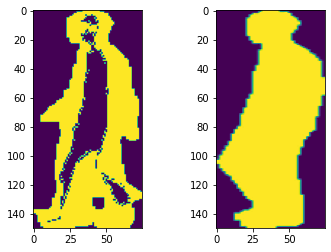

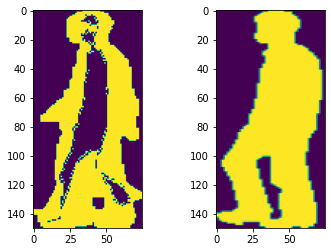

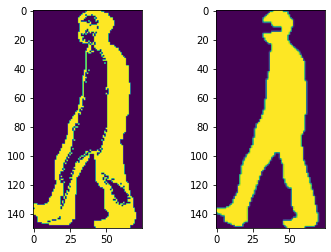

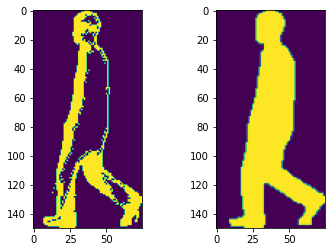

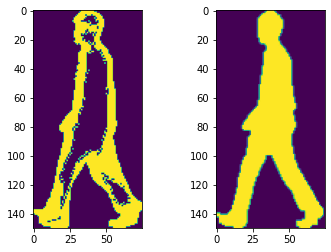

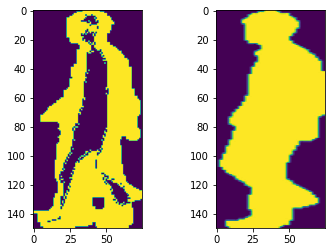

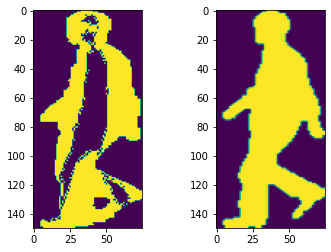

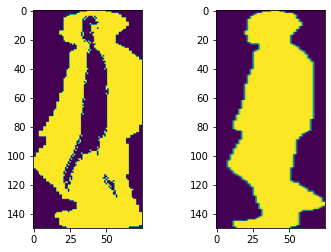

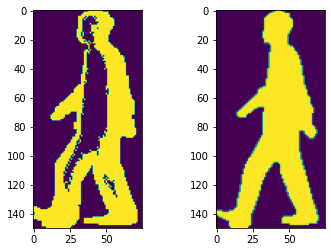

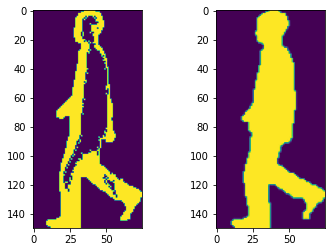

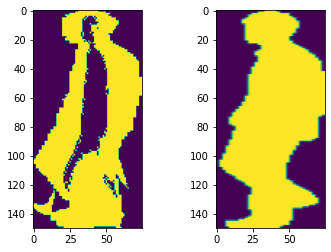

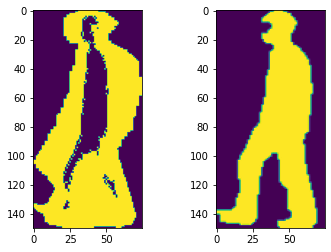

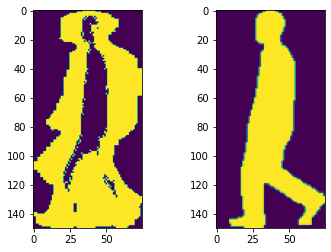

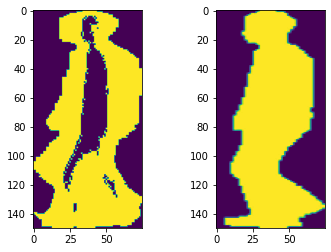

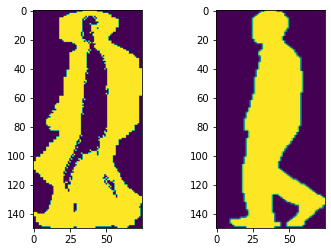

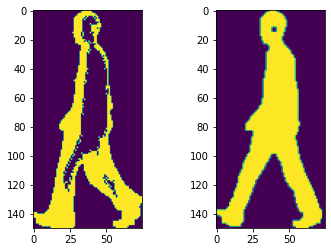

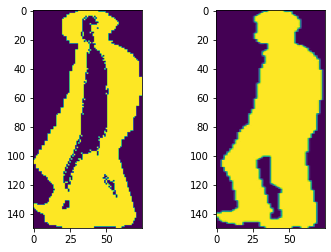

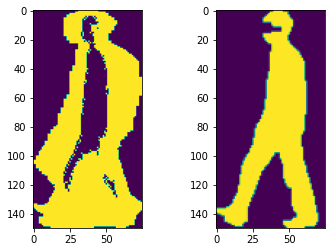

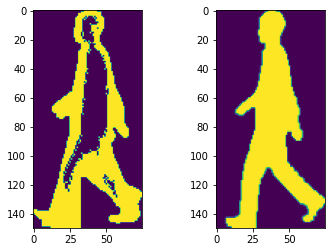

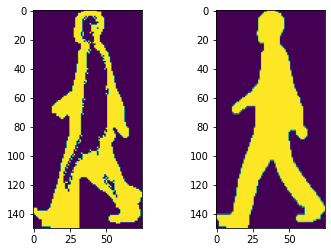

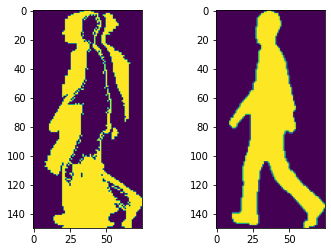

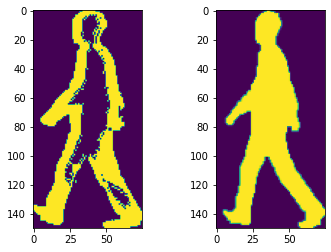

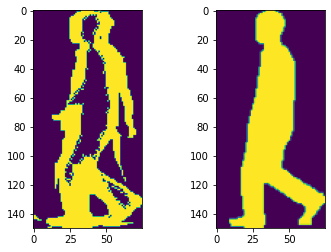

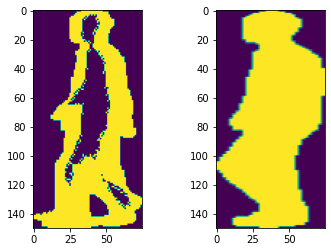

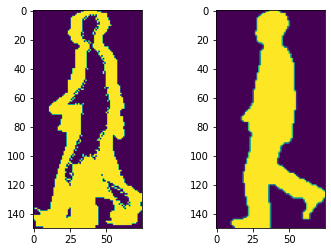

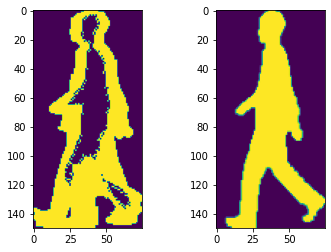

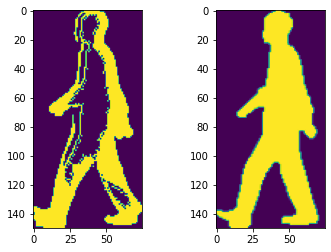

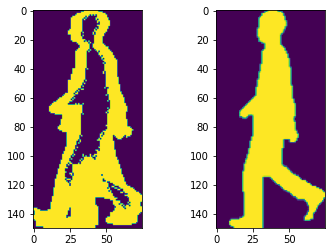

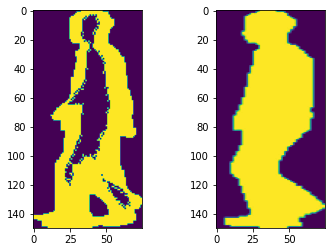

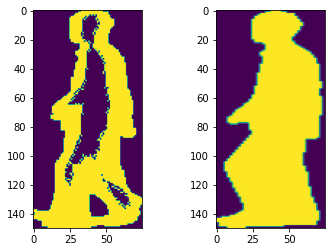

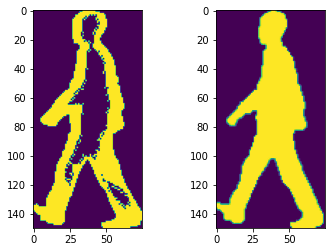

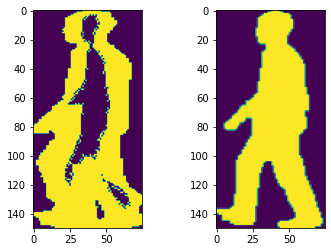

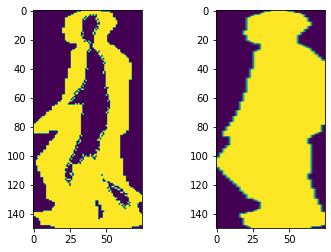

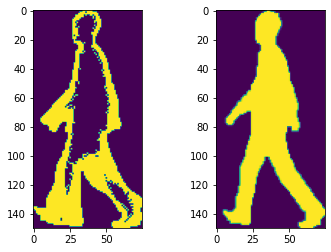

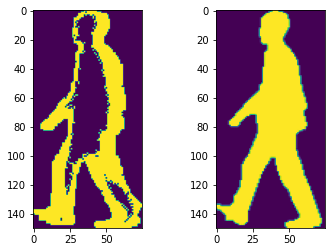

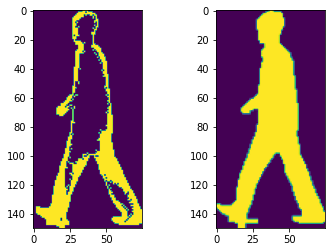

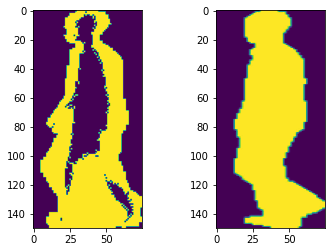

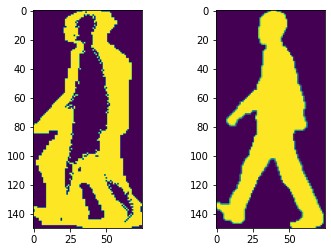

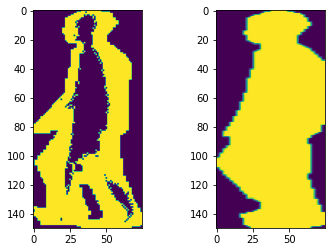

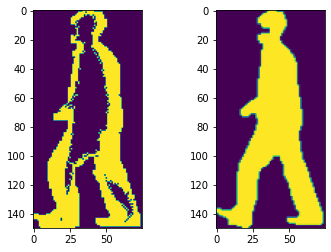

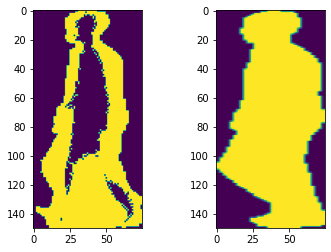

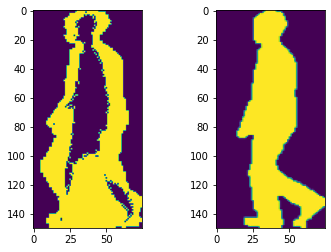

num_gaits 4
----------
person 001 nm 6


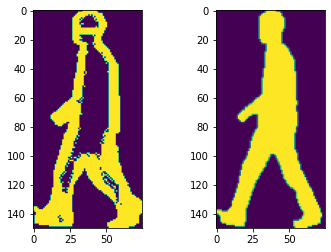

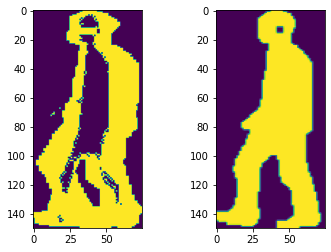

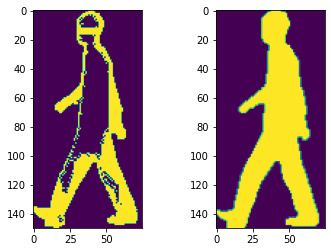

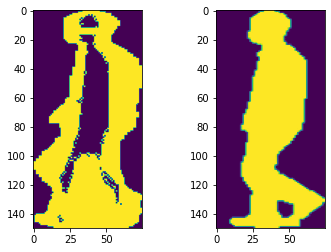

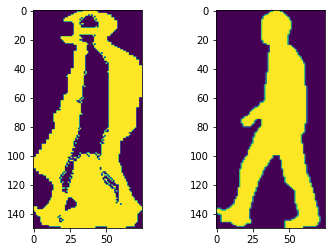

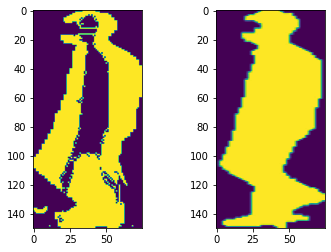

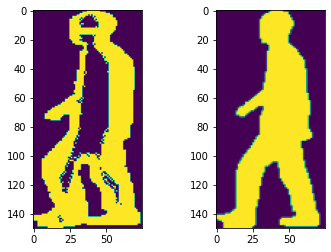

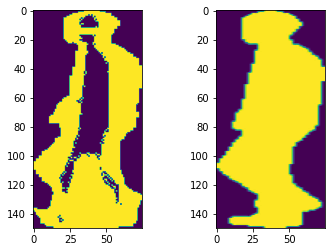

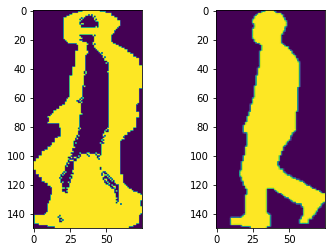

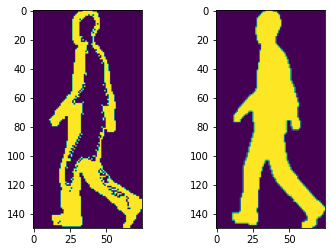

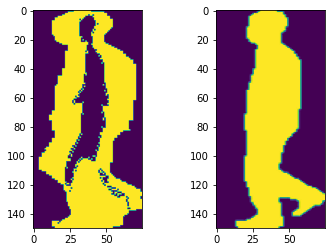

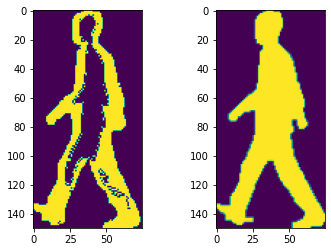

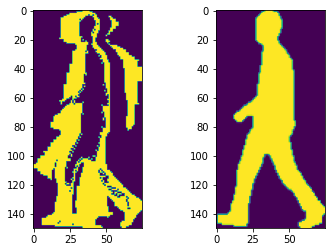

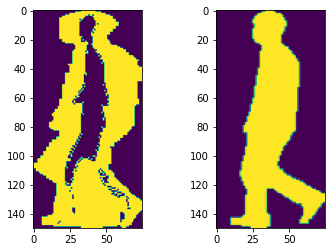

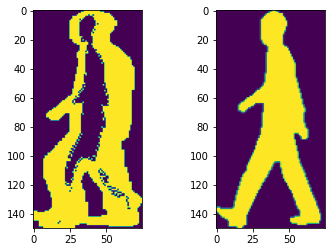

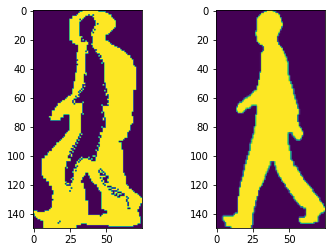

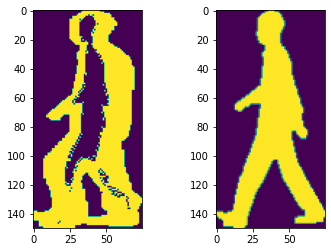

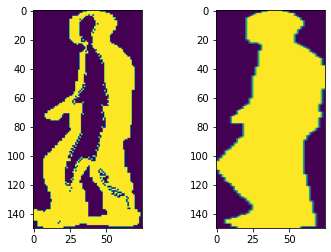

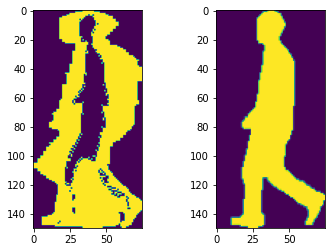

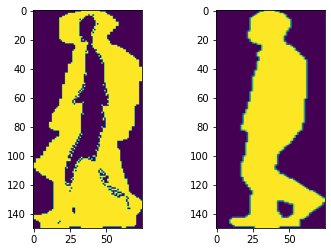

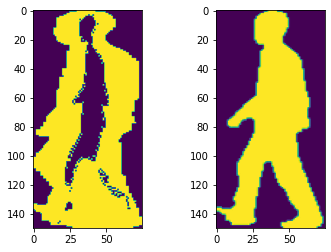

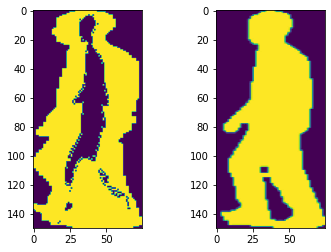

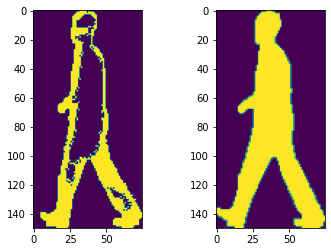

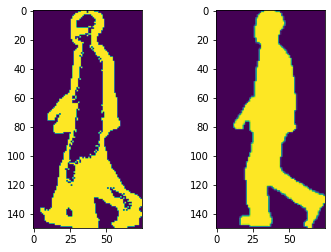

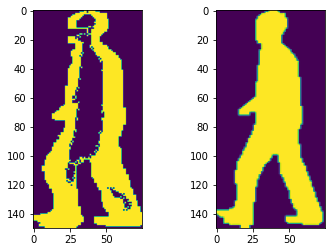

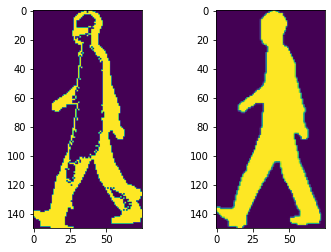

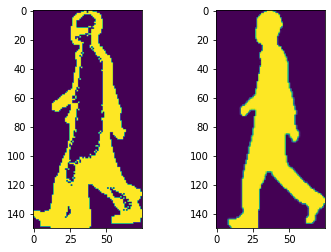

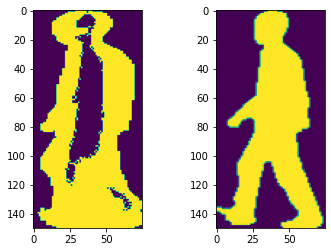

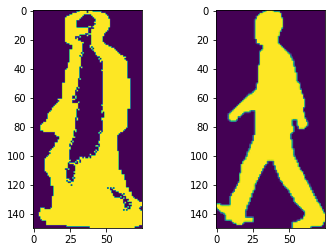

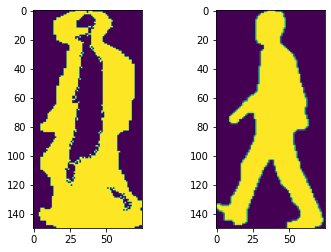

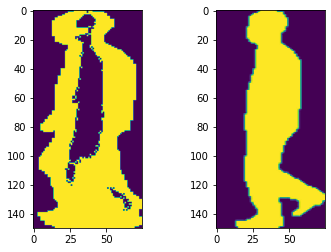

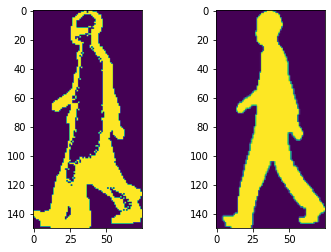

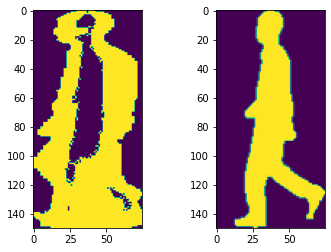

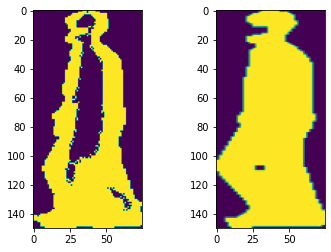

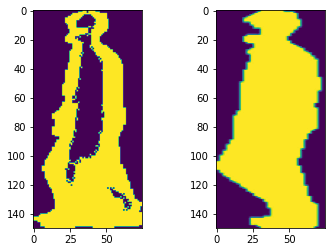

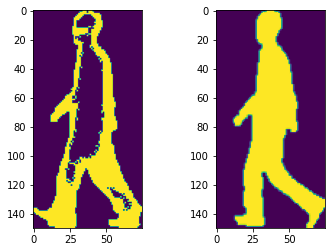

100%|██████████| 1/1 [00:52<00:00, 52.30s/it]

num_gaits 3
----------
********************


In [14]:

#gait energy images
for i in tqdm(range(1,2)):
    if i<10:
        app = "00"+str(i)
    elif i<100:
        app = "0"+str(i)
    else :
        app = str(i)
    for j in range(5,7):
        path = "/DATA/nirbhay/tharun/dataset_CASIA/"+app+"/nm-0"+str(j)+"/"
        print(f"person {app} nm {j}")
        find_gait(path,app,j)
    print("*"*20)

In [6]:
all_pred

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr